In [1]:
from mongo import MongoDBManager
import os
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import re

# Retrieving data

In [2]:
load_dotenv()
uri = os.getenv('MONGODB_URI')
database_name = os.getenv('DATABASE_NAME')
mongo_manager = MongoDBManager(uri, database_name)

In [3]:
documents = mongo_manager.read_all_documents_in_collection_with_GridFS()

# Formating Datas

In [4]:
data_formated = []
for country in documents.keys():
   for profession in documents[country].keys():
       for language in documents[country][profession].keys():
            for data in documents[country][profession][language]:
                data['country'] = country
                data['profession'] = profession
                data['language'] = language
                data_formated.append(data)
               
len(data_formated)

35880

# Visualizing Data

In [5]:
df = pd.DataFrame(data_formated)
df.describe()

,positionTitle,companyName,location,jobType,description,datePosted,salary,shiftAndSchedule,jobBenefits,country,profession,language,updatedDate
count,35880,35880,35880,35880,35880,34334,35880,35880,35880,35880,35880,35880,2408
unique,10275,5112,3667,1415,8563,36,1894,192,2298,3,9,2,1
top,Financial Analyst,Scotiabank,"Toronto, ON",[Temps plein],Posting Information\n\nPosting Number\nPG19356...,2024-07-22,,,[],Canada,Analyste de marché,en,2024-08-21
freq,304,366,2082,7896,72,5264,10626,32044,17443,20133,12081,29136,2408


In [6]:
df = df.applymap(lambda x: tuple(x) if isinstance(x, list) else x)
df = df.drop_duplicates()
df = df[((df['positionTitle'] != '') & (df['description'] != '')) | df['positionTitle'] != '']
df['jobType'] = df.apply(
    lambda x: tuple(list(x['jobType']) + list(x['salary'])) 
    if not re.search(r'\d+', str(x['salary'])) 
    else x['jobType'], 
    axis=1
)
df['salary'] = df['salary'].map(
    lambda x: '' 
    if not re.search(r'\d+', str(x))
    else x
)

df.describe()

C:\Users\PC\AppData\Local\Temp\ipykernel_11584\3461638273.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: tuple(x) if isinstance(x, list) else x)


,positionTitle,companyName,location,jobType,description,datePosted,salary,shiftAndSchedule,jobBenefits,country,profession,language,updatedDate
count,23289,23289,23289,23289,23289,22302,23289,23289,23289,23289,23289,23289,1852
unique,10275,5112,3667,1453,8563,36,1886,192,2298,3,9,2,1
top,Financial Analyst,Scotiabank,"Toronto, ON","(Temps plein,)",,2024-07-22,,,(),Canada,Analyste de marché,en,2024-08-21
freq,205,260,1394,5663,53,4082,11874,20933,11657,13769,7634,18516,1852


<Axes: xlabel='location'>

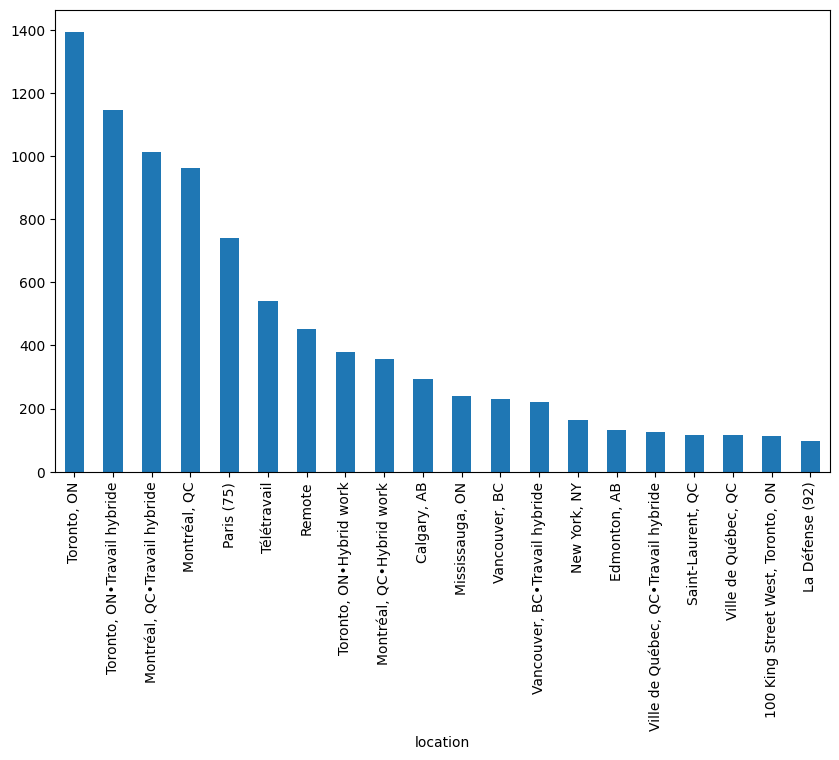

In [7]:
plt.figure(figsize=(10, 6))
df['location'].value_counts()[:20].plot(kind='bar')

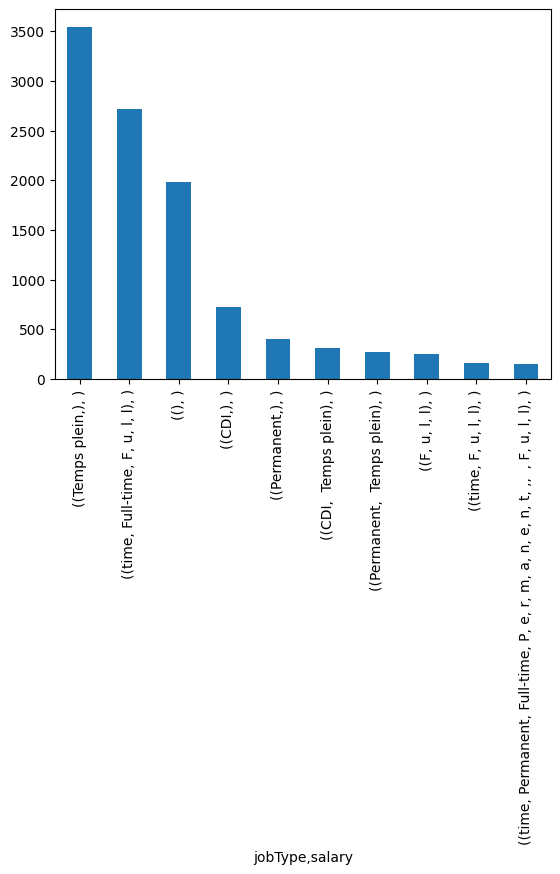

In [8]:
df_counts = df[['jobType','salary']].value_counts()[:10].plot(kind='bar')
# df_counts.plot(kind='scatter', x='positionTitle', y='location', s=df_counts['count'] * 10)
# plt.xticks(rotation=45)
# plt.show()

<Axes: xlabel='salary'>

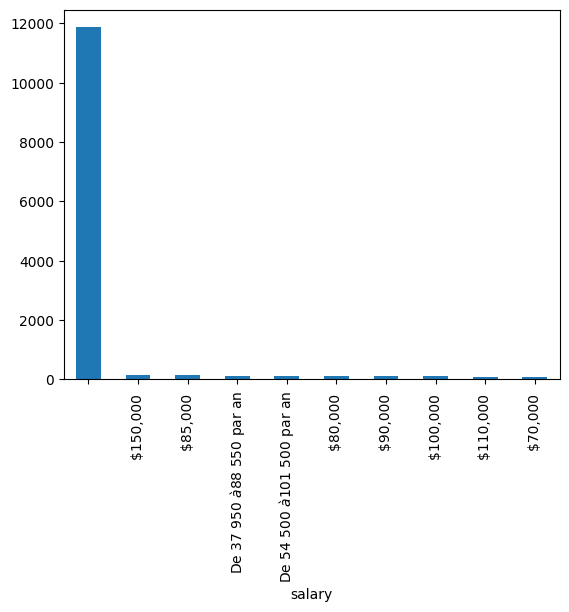

In [9]:
df['salary'] = df.apply(
    lambda x: "" 
    if not re.search(r'\d+', str(x['salary'])) 
    else x['salary'], 
    axis=1
)

# Afficher les 10 valeurs les plus fréquentes dans salary
df['salary'].value_counts()[:10].plot(kind='bar')

In [10]:
df_value_count=df[['positionTitle','companyName','location','description',"datePosted"]]
df_value_count

,positionTitle,companyName,location,description,datePosted
0,Analyste financier,QSL Canada inc.,"Ville de Québec, QC•Travail hybride",Poste convoité : Analyste financier\n\nPOSTE A...,2024-08-14
1,"Analyste principal, administration de fonds",QSL Canada inc.,"Ville de Québec, QC•Travail hybride",Poste convoité : Analyste financier\n\nPOSTE A...,2024-07-30
2,"Analyste principal(e), Fiscalité",QSL Canada inc.,"Ville de Québec, QC•Travail hybride",Poste convoité : Analyste financier\n\nPOSTE A...,2024-07-17
3,Analyste en gouvernance et protection des données,QSL Canada inc.,"Ville de Québec, QC•Travail hybride",Poste convoité : Analyste financier\n\nPOSTE A...,2024-07-17
4,Conseiller(ère) en acquisition et financement ...,QSL Canada inc.,"Ville de Québec, QC•Travail hybride",Poste convoité : Analyste financier\n\nPOSTE A...,2024-08-01
...,...,...,...,...,...
35874,"Business Consulting, Risk-Technology Risk-FAIT...",Zions Bancorporation,"Charlotte, NC 28209","Zions Bancorporation\n\nZions Bancorporation, ...",2024-08-06
35875,ADON/Risk Manager,Zions Bancorporation,"Charlotte, NC 28209","Zions Bancorporation\n\nZions Bancorporation, ...",2024-08-15
35876,Assistant Risk Manager,Zions Bancorporation,"Charlotte, NC 28209","Zions Bancorporation\n\nZions Bancorporation, ...",2024-07-31
35877,Risk Manager,Zions Bancorporation,"Charlotte, NC 28209","Zions Bancorporation\n\nZions Bancorporation, ...",2024-07-22
